# Clustering

In [3]:
from linear_algebra import squared_distance, vector_mean, distance 
import math, random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [5]:
class KMeans:
    """performs k-means clustering"""
    def __init__(self, k):
        self.k = k # number of clusters self.means = None # means of clusters

    def classify(self, input):
        """입력 데이터에 가장 인접한 군집의 인덱스를 반환""" 
        return min(range(self.k),
            key=lambda i: squared_distance(input, self.means[i])) 
    
    def train(self, inputs):
        """일단 임의로 군집을 할당한다."""
        self.means = random.sample(inputs, self.k) 
        assignments = None

        while True:
        # 군집점을 구한 후 군집을 새로 할당한다.
            new_assignments = list(map(self.classify, inputs))

            # If no assignments have changed, we're done.
            if assignments == new_assignments: 
                return
            # Otherwise keep the new assignments,
            assignments = new_assignments
            
            for i in range(self.k):
                i_points = [p for p, a in zip(inputs, assignments) if a == i] # avoid divide-by-zero if i_points is empty, i번째 cluster에 속한 점을 뽑아내기
                if i_points:
                    self.means[i] = vector_mean(i_points) # vector_mean -> 다른 말로 하면 무게중심
                    # 새로운 centriod 저장

In [9]:
data = [[-14,-5],[13,13],[20,23],[-19,-11],[-9,-16],[21,27],[-49,15],[26,13],[-46,5],[-34,-1],[11,15],[-49,0],[-22,-16],[19,28],[-12,-8],[-13,-19],[-41,8],[-11,-6],[-25,-9],[-18,-3]]

3-means:
[[-15.888888888888888, -10.333333333333332], [-43.800000000000004, 5.4], [18.333333333333332, 19.833333333333332]]


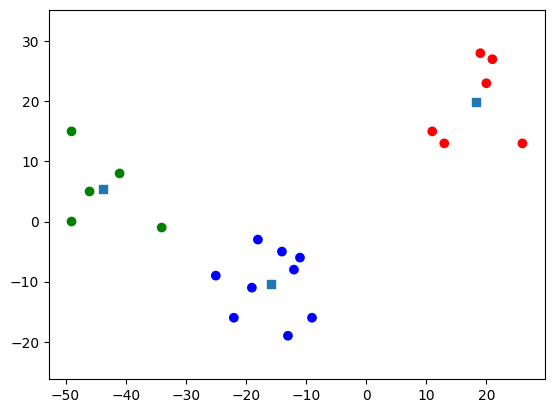

In [14]:
# random.seed(0)
random.seed(1)
clusterer = KMeans(3)
clusterer.train(data)
print("3-means:")
print(clusterer.means)
my_clusters = [clusterer.classify(p) for p in data]
colormap = 'bgrcmyk'
my_color = list(map(lambda i: colormap[i], my_clusters))
x, y = zip(*data)
plt.scatter(x, y, color=my_color)
xc, yc = zip(*clusterer.means)
plt.scatter(xc, yc, marker = 's')
plt.axis('equal')
plt.show()

3-means:
[[-25.857142857142854, -4.714285714285714], [18.333333333333332, 19.833333333333332]]


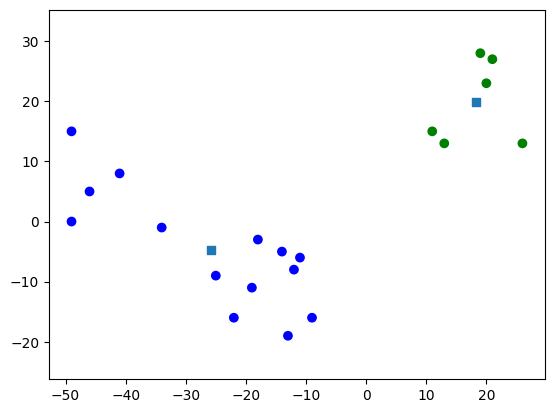

In [15]:
random.seed(0)
# random.seed(1)
clusterer = KMeans(2)
clusterer.train(data)
print("3-means:")
print(clusterer.means)
my_clusters = [clusterer.classify(p) for p in data]
colormap = 'bgrcmyk'
my_color = list(map(lambda i: colormap[i], my_clusters))
x, y = zip(*data)
plt.scatter(x, y, color=my_color)
xc, yc = zip(*clusterer.means)
plt.scatter(xc, yc, marker = 's')
plt.axis('equal')
plt.show()

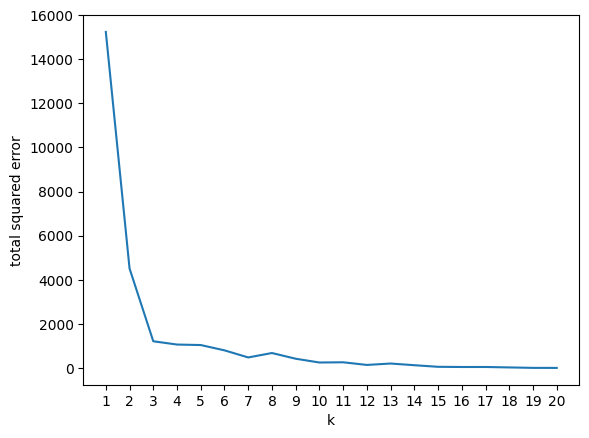

In [17]:
def squared_clustering_error(inputs, k):
    clusterer = KMeans(k)
    clusterer.train(inputs)
    means = clusterer.means
    assignments = list(map(clusterer.classify, inputs))

    return sum(squared_distance(input, means[cluster]) for input, cluster in zip(inputs, assignments))

ks = range(1, len(data)+1)
errors = [squared_clustering_error(data, k) for k in ks]

plt.plot(ks, errors)
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("total squared error")
plt.show()

In [20]:
leaf1 = ([10, 20],)
leaf2 = ([30, -15],)

In [21]:
merged = (1, [leaf1, leaf2])

In [23]:
def is_leaf(cluster):
    return len(cluster) == 1

# 잎 군집에는 자식도 없으므로, 그에 대응하는 함수
def get_children(cluster):
    if is_leaf(cluster):
        raise TypeError("a leaf cluster has no children")
    else:
        return cluster[1]

# 군집에 초함된 값들을 모두 반환하는 함수
def get_values(cluster):
    if is_leaf(cluster):
        return cluster
    else:
        return [value for child in get_children(cluster) for value in get_values(child)]

In [24]:
# 군집간의 거리를 정의할 수 있어야 한다.
def cluster_distance(cluster1, cluster2, distance_agg=min):
    """ cluster1에 속하는 점괗 cluster2에 속하는 점 사이의 모든거리를 계산하는 결과로 나오는 리스트에 distance_agg를 적용
    """
    return distance_agg([distance(input1, input2) for input1 in get_values(cluster1) for input2 in get_values(cluster2)])

In [26]:
# 병합 순서 
def get_merge_order(cluster):
    if is_leaf(cluster):
        return float('inf') # 한번도 병합된 적이 없다.)
    else:
        return cluster[0]

In [27]:
def bottom_up_cluster(inputs, distance_agg=min):
    clusters = [(input,) for input in inputs]

    while len(clusters) > 1:
        c1, c2 = min([(cluster1, cluster2)
                      for i, cluster1 in enumerate(clusters)
                      for cluster2 in clusters[:i]],
                      key=lambda p: cluster_distance(p[0], p[1], distance_agg))
        
        clusters = [ c for c in clusters if c!= c1 and c != c2]

        merged_clusters = (len(clusters),[c1, c2])

        clusters.append(merged_clusters)

    return clusters[0]

In [28]:
def generate_clusters(base_cluster, num_clusters):
    clusters = [base_cluster]

    while len(clusters) < num_clusters:
        next_cluster = min(clusters, key=get_merge_order)
        clusters = [c for c in clusters if c != next_cluster]
        clusters.extend(get_children(next_cluster))
    
    return clusters

In [32]:
print("bottom up hierarchical clustering")
base_cluster = bottom_up_cluster(data)
print(base_cluster)
print()
print("three clusters, min:")
for cluster in generate_clusters(base_cluster, 3):
    print(get_values(cluster))

print("\n")
print("four clusters, min:")
for cluster in generate_clusters(base_cluster, 4):
    print(get_values(cluster))

bottom up hierarchical clustering
(0, [(1, [(3, [(14, [(18, [([19, 28],), ([21, 27],)]), ([20, 23],)]), ([26, 13],)]), (16, [([11, 15],), ([13, 13],)])]), (2, [(4, [(5, [(9, [(11, [([-49, 0],), ([-46, 5],)]), ([-41, 8],)]), ([-49, 15],)]), ([-34, -1],)]), (6, [(7, [(8, [(10, [([-22, -16],), ([-19, -11],)]), ([-25, -9],)]), (13, [(15, [(17, [([-11, -6],), ([-12, -8],)]), ([-14, -5],)]), ([-18, -3],)])]), (12, [([-13, -19],), ([-9, -16],)])])])])

three clusters, min:
[[-49, 0], [-46, 5], [-41, 8], [-49, 15], [-34, -1], [-22, -16], [-19, -11], [-25, -9], [-11, -6], [-12, -8], [-14, -5], [-18, -3], [-13, -19], [-9, -16]]
[[19, 28], [21, 27], [20, 23], [26, 13]]
[[11, 15], [13, 13]]


four clusters, min:
[[19, 28], [21, 27], [20, 23], [26, 13]]
[[11, 15], [13, 13]]
[[-49, 0], [-46, 5], [-41, 8], [-49, 15], [-34, -1]]
[[-22, -16], [-19, -11], [-25, -9], [-11, -6], [-12, -8], [-14, -5], [-18, -3], [-13, -19], [-9, -16]]


In [33]:
three_clusters = [get_values(cluster) for cluster in generate_clusters(base_cluster, 3)]


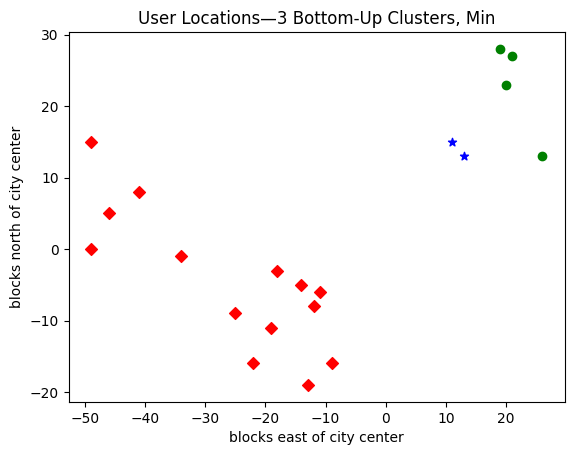

In [35]:
for i, cluster, marker, color in zip([1, 2, 3], three_clusters,
                                     ['D','o','*'],
                                        ['r','g','b']): 
    xs, ys = zip(*cluster) # magic unzipping trick
    plt.scatter(xs, ys, color=color, marker=marker)
    # put a number at the mean of the cluster
    x, y = vector_mean(cluster)

plt.title("User Locations—3 Bottom-Up Clusters, Min")
plt.xlabel("blocks east of city center")
plt.ylabel("blocks north of city center")
plt.show()

In [36]:
print()
print("three clusters, max:")
base_cluster = bottom_up_cluster(data, max)
for cluster in generate_clusters(base_cluster, 3):
    print(get_values(cluster))



three clusters, max:
[[11, 15], [13, 13], [26, 13], [19, 28], [21, 27], [20, 23]]
[[-41, 8], [-49, 15], [-49, 0], [-46, 5], [-34, -1]]
[[-11, -6], [-12, -8], [-14, -5], [-18, -3], [-22, -16], [-19, -11], [-25, -9], [-13, -19], [-9, -16]]


In [39]:

three_clusters = [get_values(cluster) for cluster in generate_clusters(base_cluster, 3)]

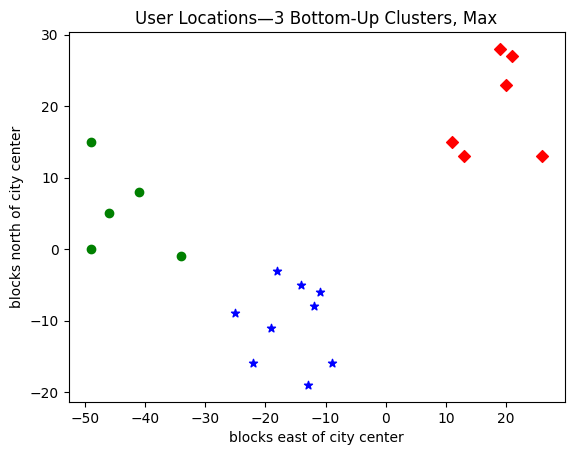

In [41]:
for i, cluster, marker, color in zip([1, 2, 3], three_clusters,
                                     ['D','o','*'],
                                        ['r','g','b']): 
    xs, ys = zip(*cluster) # magic unzipping trick
    plt.scatter(xs, ys, color=color, marker=marker)
    # put a number at the mean of the cluster
    x, y = vector_mean(cluster)

plt.title("User Locations—3 Bottom-Up Clusters, Max")
plt.xlabel("blocks east of city center")
plt.ylabel("blocks north of city center")
plt.show()